In [163]:
import numpy as np
import math
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio
import copy

In [164]:
n_s = 201  # state space
n_a = 2  # action space
n_sa = n_s * n_a  # state-action space
u = 5  # adding customers
K = 15  #
cf = 100
ch = 2
gamma = 0.95

T = 500

p = np.zeros((n_s, n_a, n_s))
cost = np.zeros((n_s,n_a))
policy = np.zeros(n_s)
# bellman equ
q = np.zeros((n_s,n_a))
v = np.zeros(n_s)

# rewards and transition
for s in range(n_s):
    for a in range(n_a):
        cost[s,a] = ch*s + cf*a
        for j in range(u):
            s_new = int( min( max(s - K*a, 0) + j + 1, n_s-1) )
            p[s, a, s_new] = p[s, a, s_new] + 0.2 

In [165]:
# enumeration
for t in range(T):
    for s in range(n_s):
        for a in range(n_a):
            v[s] = min([cost[s,a] + gamma*sum([ p[s,a,s_new]*v[s_new] for s_new in range(n_s) ]) for a in range(n_a) ])

for s in range(n_s):
    for a in range(n_a):
        q[s,a] = cost[s,a] + gamma*sum([ p[s,a,s_new]*v[s_new] for s_new in range(n_s) ])

In [179]:
policy_enu = np.argmin(q, axis = 1)
v_enu = v
print("The optimal policy calculated by enumeration is to dispatch the shuttle when the customers \
waiting is larger than %d." % (np.argmax(policy_enu)))

The optimal policy calculated by enumeration is to dispatch the shuttle when the customers waiting is larger than 13.


In [167]:
# value iter
policy = np.zeros(n_s)
# bellman equ
q = np.zeros((n_s,n_a))
v = np.zeros(n_s)
v_new = np.zeros(n_s)

eps1 = 1
v_new1 = np.zeros(n_s)

while eps1 >= 1e-5:
    for s in range(n_s):
        for a in range(n_a):
            q[s,a] = cost[s,a] + gamma*sum([ p[s,a,s_new]*v[s_new] for s_new in range(n_s) ])
        policy = np.argmin(q, axis = 1)
        v_new[s] = q[s, int(policy[s])]
    eps1 = np.max(np.abs(v_new - v))
    # print(q)
    # v = v_new
    for s in range(n_s):
        v[s] = v_new[s]

In [180]:
policy_val = policy
v_val = v
print("The optimal policy calculated by value iteration is: %d." % (np.argmax(policy_val)))

The optimal policy calculated by value iteration is: 13.


In [169]:
# policy iter

policy = np.zeros(n_s)
# bellman equ
q = np.zeros((n_s,n_a))
v = np.zeros(n_s)
v_new = np.zeros(n_s)

eps1 = 1
v_new1 = np.zeros(n_s)

while eps1 >= 1e-5:
    v = np.zeros(n_s)
    for _ in range(500):
        # policy evaluation
        for s in range(n_s):
            for a in range(n_a):
                q[s,a] = cost[s,a] + gamma*sum([ p[s,a,s_new]*v[s_new] for s_new in range(n_s) ])
            v[s] = q[s, int(policy[s])]
    policy = np.argmin(q, axis = 1)
    eps1 = np.max(np.abs(v_new1 - v))
    v_new1 = v

In [181]:
policy_p = policy
v_p = v
print("The optimal policy calculated by policy iteration is: %d." % (np.argmax(policy_p)))

The optimal policy calculated by policy iteration is: 13.


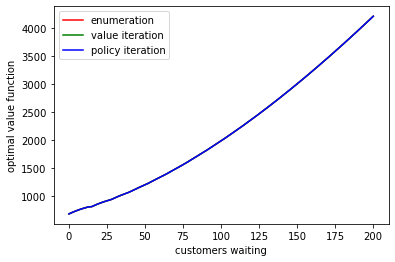

These plots almost coincide.


In [173]:
plt.plot(v_enu, label = 'enumeration', color = 'r')
plt.plot(v_val, label = 'value iteration', color = 'g')
plt.plot(v_p, label = 'policy iteration', color = 'b')
plt.legend()
plt.xlabel('customers waiting')
plt.ylabel('optimal value function')
plt.show()
print('These plots almost coincide.')